# Image Blurring Techniques with OpenCV

In this notebook, we will explore different types of **image blurring (smoothing)** techniques using OpenCV.  
Blurring is commonly used to reduce noise, smooth details, or create artistic effects.

We will use the sample image stored at:  
`assets/Image2.jpg`

---

## 1. Import Libraries
```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def show_image(title, image, cmap=None):
    plt.figure(figsize=(6,6))
    if len(image.shape) == 2:  # grayscale
        plt.imshow(image, cmap="gray")
    else:  # color (BGR to RGB)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()
```

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display two images side by side
def show_side_by_side(title1, img1, title2, img2):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    if len(img1.shape) == 2:
        plt.imshow(img1, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")
    
    plt.subplot(1,2,2)
    if len(img2.shape) == 2:
        plt.imshow(img2, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")
    
    plt.show()


## 2. Load the Image

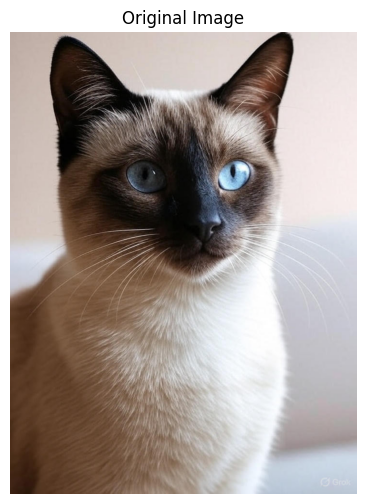

In [13]:
# Load the image
image = cv2.imread("assets/Image1.jpeg")

# Show original
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()


## 🔹 1. Average Blur

**Description:**  
- Each pixel is replaced with the **average of its neighboring pixels**.  
- Creates a simple smoothing effect, but it can blur edges significantly.  

**Use Case:**  
- Reducing overall noise.  
- Quick and simple blur for preprocessing.

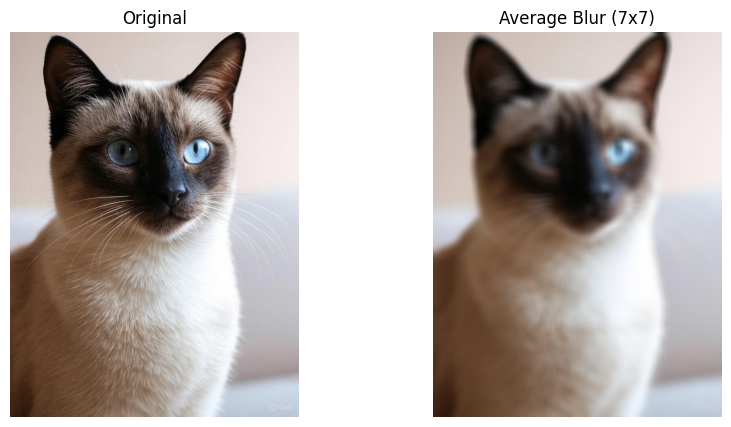

In [18]:
# Apply Average Blur
average_blur = cv2.blur(image, (20,20))

# Compare with original
show_side_by_side("Original", image, "Average Blur (7x7)", average_blur)



## 🔹 2. Gaussian Blur

**Description:**  
- Uses a **Gaussian kernel** where closer pixels have higher weights.  
- Produces a more **natural-looking blur** compared to average blur.  

**Use Case:**  
- Removing Gaussian noise.  
- Preprocessing before edge detection.  
- Image smoothing while retaining some details.

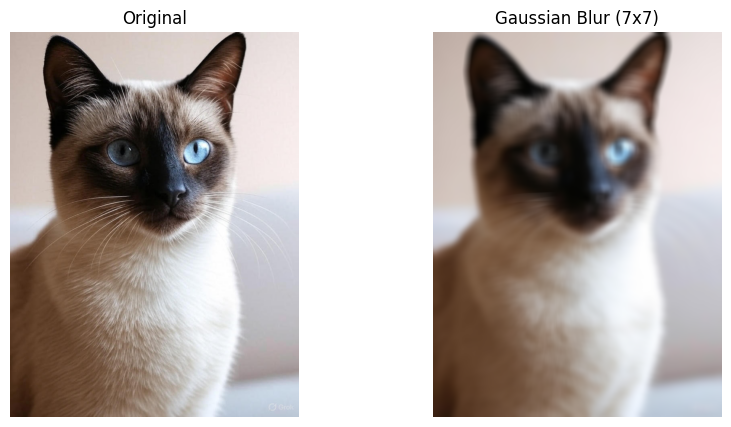

In [30]:
# Apply Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (21,21), 20)

show_side_by_side("Original", image, "Gaussian Blur (7x7)", gaussian_blur)


## 🔹 3. Median Blur

**Description:**  
- Each pixel is replaced with the **median value** of the neighboring pixels.  
- Very effective for removing **salt & pepper noise**.  

**Use Case:**  
- Denoising images with impulse noise.  
- Preserving edges better than average blur.

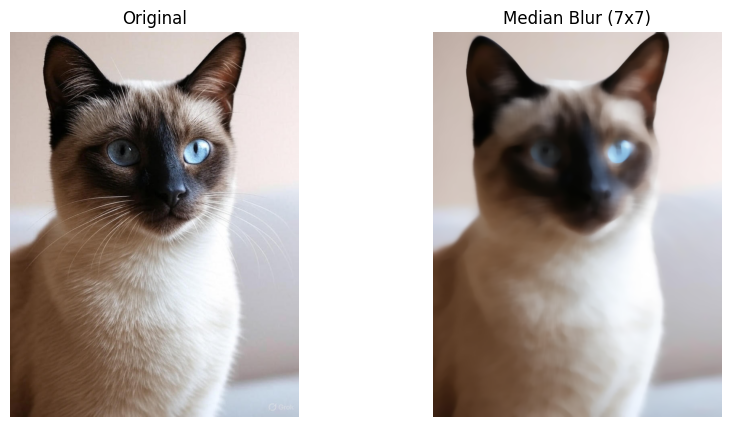

In [26]:
# Apply Median Blur
median_blur = cv2.medianBlur(image, 21)

# Compare with original
show_side_by_side("Original", image, "Median Blur (7x7)", median_blur)


## 🔹 4. Bilateral Filter

**Description:**  
- Blurs the image **while preserving edges**.  
- Takes into account both **spatial distance** (pixel location) and **intensity difference** (pixel color/brightness).  

**Use Case:**  
- Denoising natural images (faces, landscapes).  
- Applications where edges must remain sharp. 

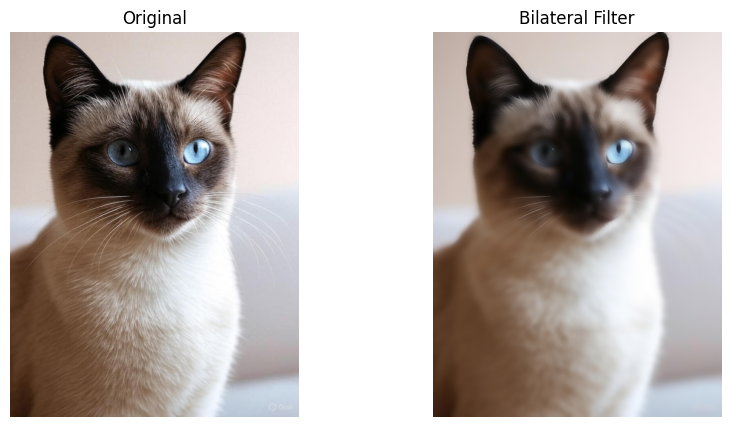

In [28]:
# Apply Bilateral Filtering
bilateral_blur = cv2.bilateralFilter(image, 20, 200, 200)

# Compare with original
show_side_by_side("Original", image, "Bilateral Filter", bilateral_blur)


## 7. Comparison of Blurring Techniques

Let's compare all techniques side by side.

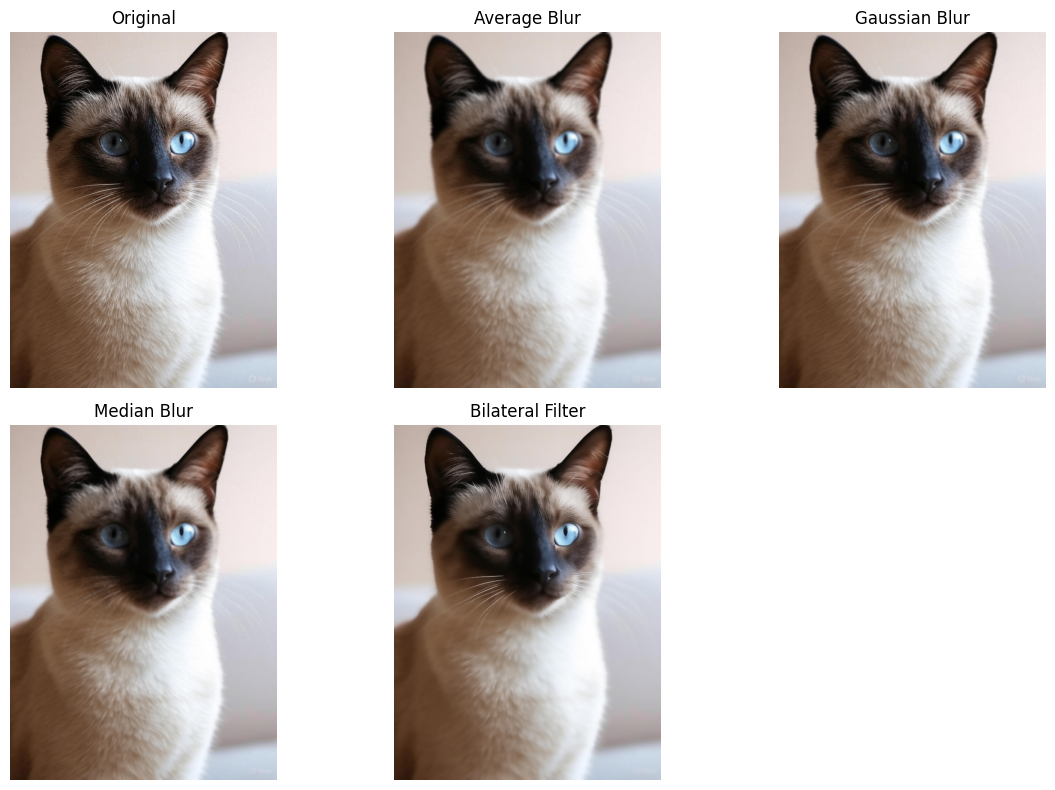

In [9]:
plt.figure(figsize=(12,8))

titles = ["Original", "Average Blur", "Gaussian Blur", "Median Blur", "Bilateral Filter"]
images = [image, average_blur, gaussian_blur, median_blur, bilateral_blur]

for i in range(5):
    plt.subplot(2,3,i+1)
    img = images[i]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


# 📌 Summary of Blur Types

- **Average Blur** → Simple smoothing, but edges are blurred.  
- **Gaussian Blur** → Natural smoothing, commonly used in computer vision.  
- **Median Blur** → Best for removing salt & pepper noise.  
- **Bilateral Filter** → Smooths noise while keeping edges sharp.